### Questions to Solve

+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('udemy_course_data.csv')
df.head()

course_id                                       course_title  ... month  day
0    1070968                 Ultimate Investment Banking Course  ...     1   18
1    1113822  Complete GST Course & Certification - Grow You...  ...     3    9
2    1006314  Financial Modeling for Business Analysts and C...  ...    12   19
3    1210588  Beginner to Pro - Financial Analysis in Excel ...  ...     5   30
4    1011058       How To Maximize Your Profits Trading Options  ...    12   13

[5 rows x 18 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

### EDA on Subject/Category

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

In [5]:
len(df['course_title'].unique())

3668

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


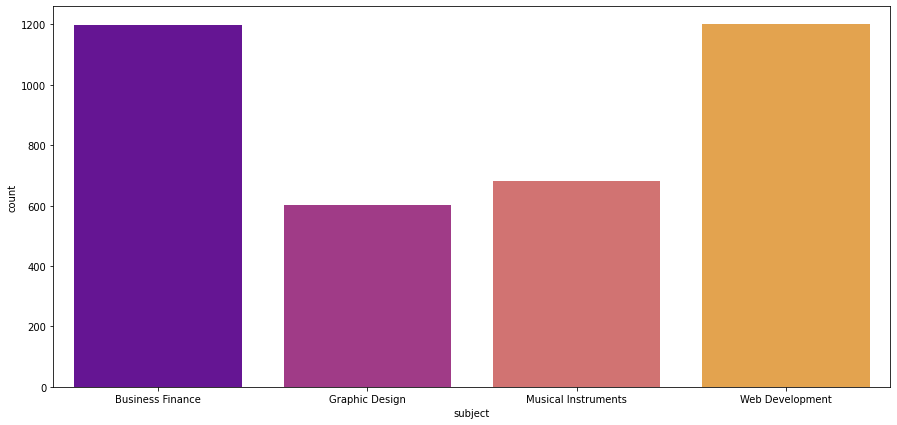

In [6]:
plt.figure(figsize=(15,7))
sn.countplot(df['subject'],palette='plasma')

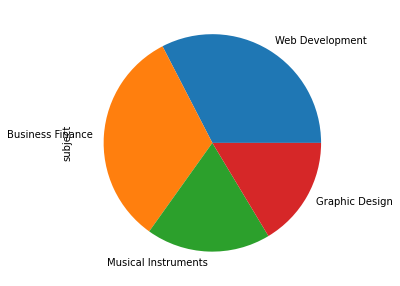

In [7]:
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

### EDA on Subscribers
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

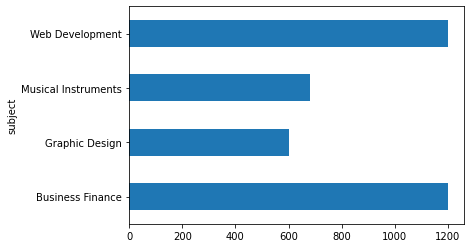

In [8]:
df.groupby('subject')['num_subscribers'].count().plot(kind = 'barh')

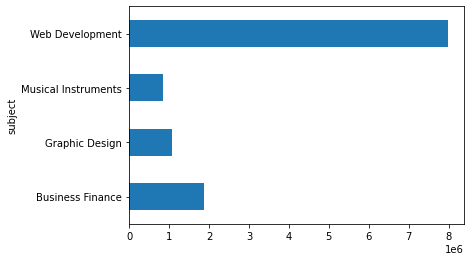

In [9]:
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'barh')

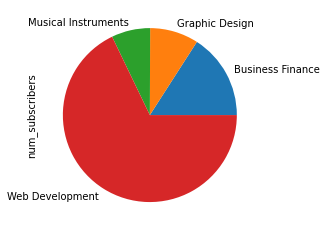

In [10]:
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'pie')

### EDA on Levels

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels


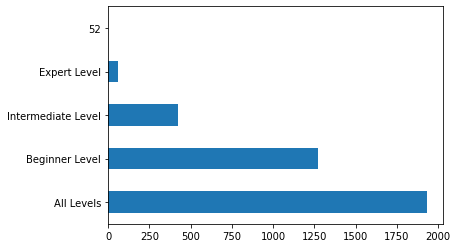

In [11]:
df['level'].value_counts().plot(kind = 'barh')

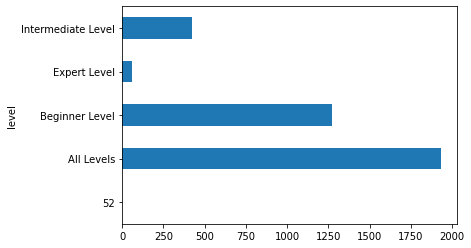

In [12]:
## grouping the level as per persons intrest

df.groupby(['level'])['num_subscribers'].count().plot(kind='barh')

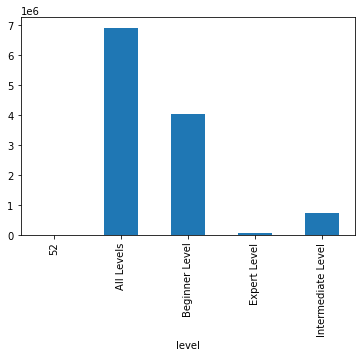

In [13]:
df.groupby(['level'])['num_subscribers'].sum().plot(kind = 'bar')

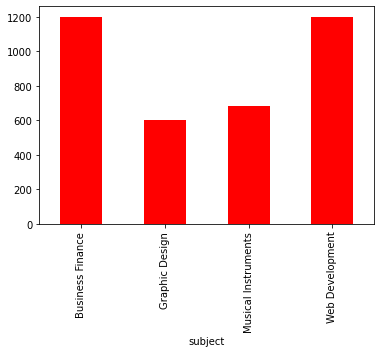

In [14]:
# How many levels per subject category

df.groupby(['subject'])['level'].count().plot(kind = 'bar',color = 'red')

Text(0, 0.5, 'Count of Levels')

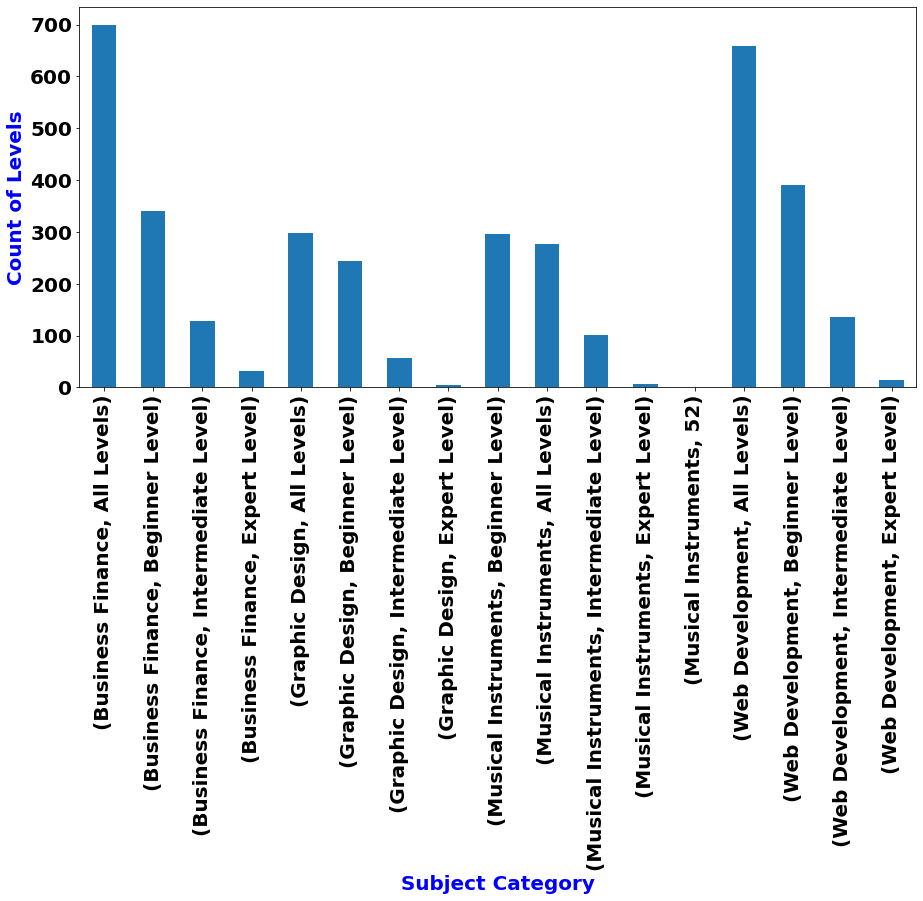

In [15]:
# Plot of How many levels per subject category

plt.figure(figsize=(15,7))
df.groupby(['subject'])['level'].value_counts().plot(kind = 'bar')

plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Subject Category',fontsize = 20,fontweight = 'bold',color = 'blue')
plt.ylabel('Count of Levels',fontsize = 20,fontweight = 'bold',color = 'blue')

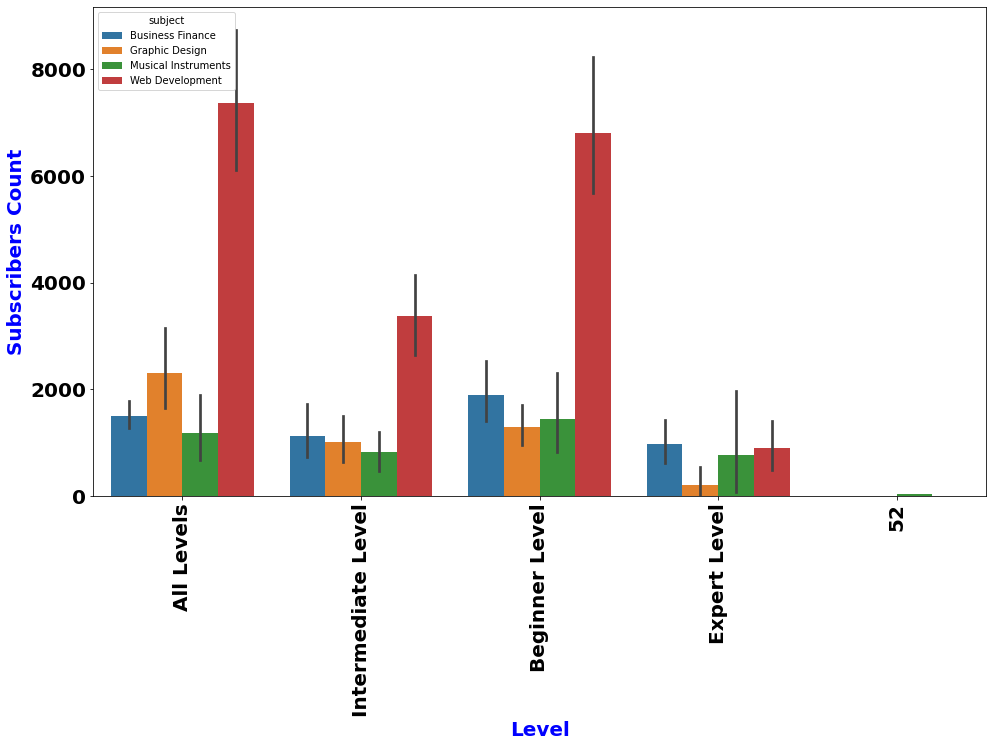

In [16]:
# number of levels and subscribers count

plt.figure(figsize=(16,9))
sn.barplot(x='level',y='num_subscribers', hue='subject',data=df)
plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Level',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Subscribers Count',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()

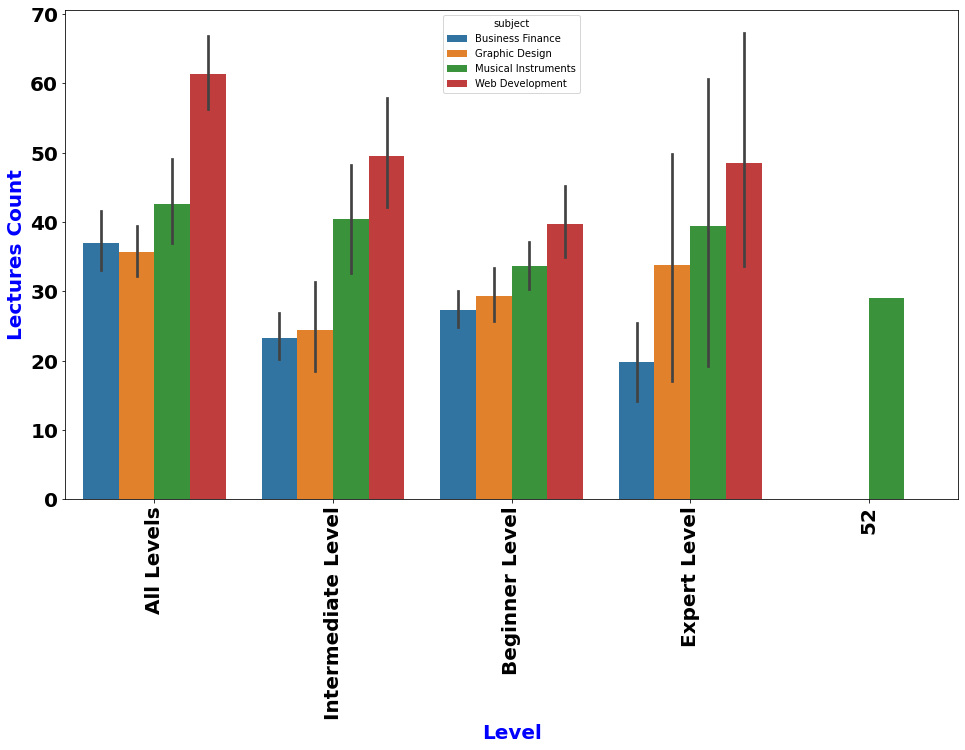

In [17]:
# number of levels and number of lectures count

plt.figure(figsize=(16,9))
sn.barplot(x='level',y='num_lectures', hue='subject',data=df)
plt.xticks(fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 20,fontweight = 'bold')
plt.xlabel('Level',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Lectures Count',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.xticks(rotation = 'vertical')
plt.show()

In [18]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

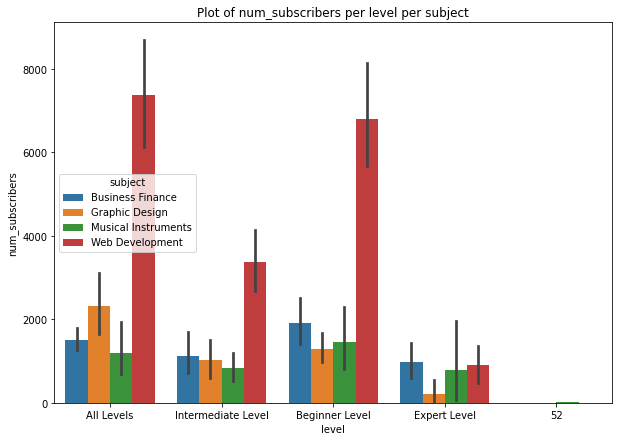

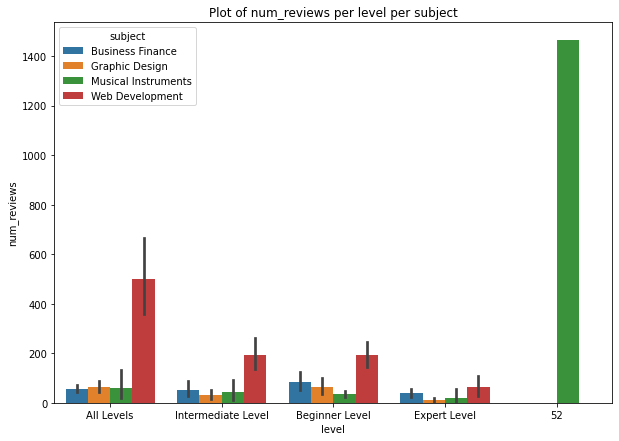

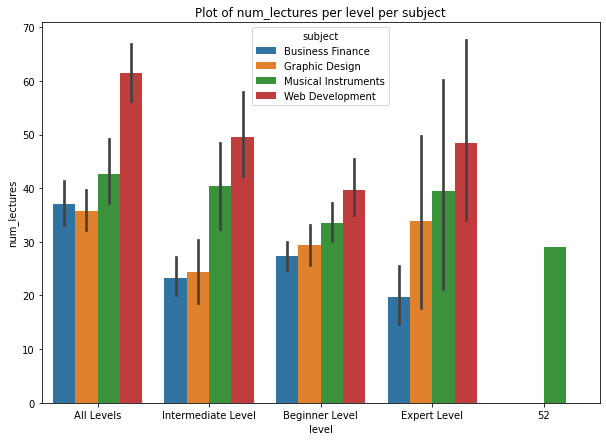

In [19]:
# reviews_level plot and lectures_level plot

def plotdata(df,feature):
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sn.barplot(x = 'level',y = feature,data=df,hue = 'subject')
    plt.show()
    
    
featureslist = ['num_subscribers', 'num_reviews', 'num_lectures']
for feature in featureslist:
    plotdata(df,feature)

### EDA on Price
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [20]:
df['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135])

In [22]:
# replacing the Free/True courses with 0 

df['price'] = df['price'].astype(str).str.replace('TRUE|Free','0')

df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '0', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [23]:
df['price'] = df['price'].astype('float')

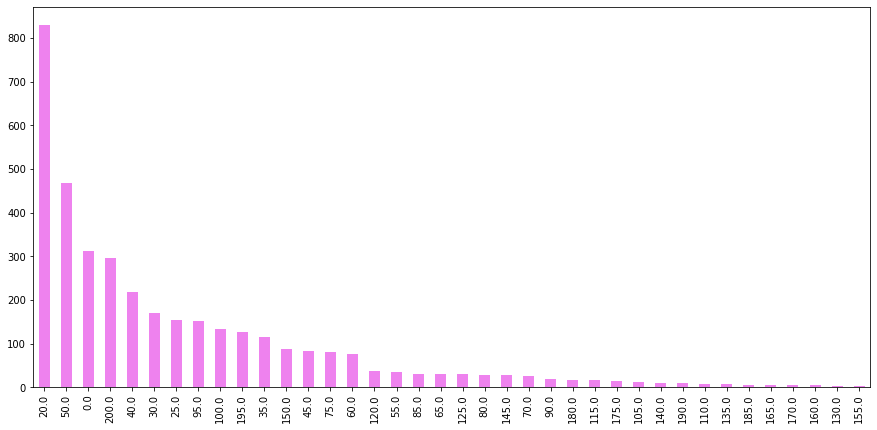

In [24]:
plt.figure(figsize=(15,7))
df['price'].value_counts().plot(kind = 'bar',color = 'violet')

In [25]:
# What is the most profitable course
# price x num_subscriber

df['profit'] = df['price'] * df['num_subscribers']
df.head(3)

course_id                                       course_title  ... month  day
0    1070968                 Ultimate Investment Banking Course  ...     1   18
1    1113822  Complete GST Course & Certification - Grow You...  ...     3    9
2    1006314  Financial Modeling for Business Analysts and C...  ...    12   19

[3 rows x 18 columns]

In [26]:
# The most profitable course
    
df[df['profit']==df['profit'].max()].style.background_gradient(cmap = 'plasma')

In [27]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                                200
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                       2.43168e+07
published_date                                     

In [28]:
# The least profitable course,these may be free course
    
df[df['profit']==df['profit'].min()].style.background_gradient(cmap = 'plasma')

In [29]:
# Average profitable course

df[df['profit']>=df['profit'].mean()].style.background_gradient(cmap = 'plasma')

In [30]:
### How Many Courses on Udemy Are paid or free

df['is_paid'].unique()

array([ True, False])

In [31]:
paid_dict = {'True':True,'False':False,'FALSE':False,
             'TRUE':True,'https://www.udemy.com/learnguitartoworship/':True}

df['is_paid'] = df['is_paid'].map(paid_dict)

df['is_paid'].unique()

array([nan], dtype=object)

### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [36]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

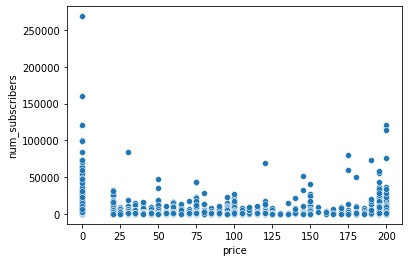

In [37]:
sn.scatterplot(data=df,x='price',y='num_subscribers')

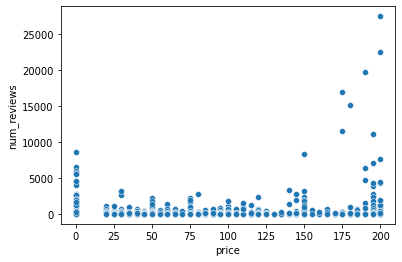

In [38]:
sn.scatterplot(data=df,x = 'price',y = 'num_reviews')

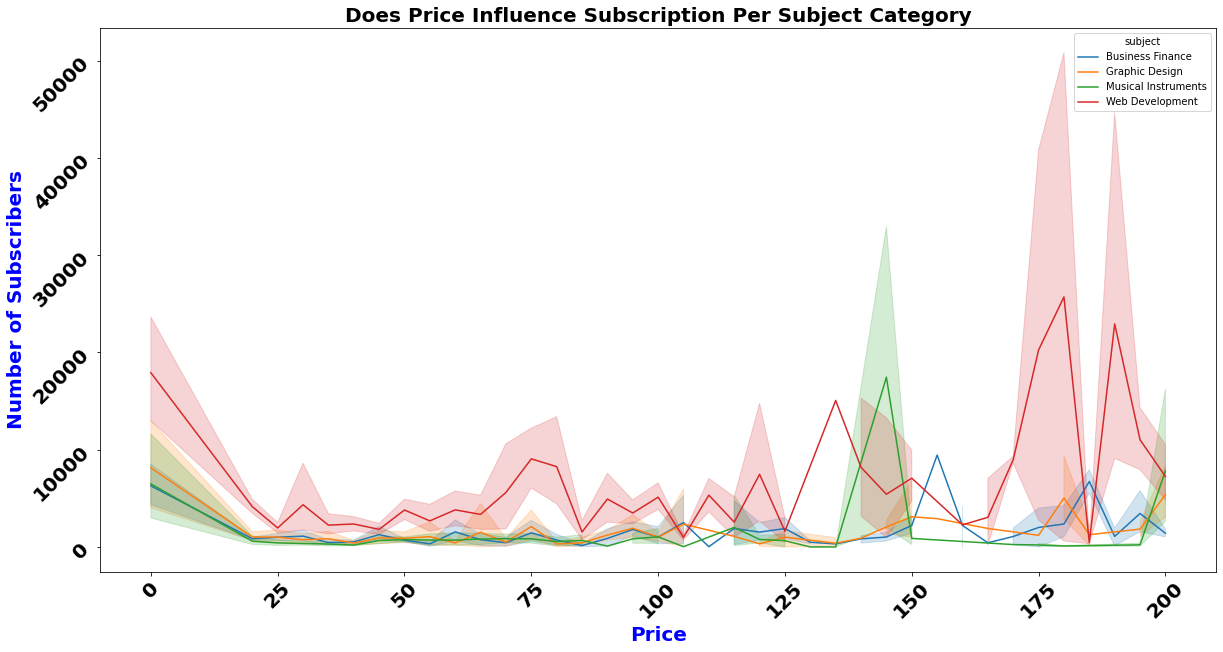

In [39]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category",
         fontsize = 20,fontweight = 'bold')

sn.lineplot(data=df,x='price',y='num_subscribers',hue='subject')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Price',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()


<div class="text_cell_render border-box-sizing rendered_html">
<h3>Question on Time<a class="anchor-link" href="#Question-on-Time">¶</a>
</h3>
<ul>
<li>Published Year<ul>
<li>Number of courses per year</li>
<li>Distribution of subjects per year</li>
<li>Which year has the highest number of courses</li>
<li>What is the trend of courses per year</li>
</ul>
</li>
</ul>

</div>

In [40]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [41]:
# we need to extract year,month,date from the published timestamp

# so for that i will extract the year-month-date from the timestamp 

df['published_date'] = df['published_timestamp'].apply(lambda x:x.split('T')[0])

In [42]:
df.head(2)

course_id                                       course_title  ... month day
0    1070968                 Ultimate Investment Banking Course  ...     1  18
1    1113822  Complete GST Course & Certification - Grow You...  ...     3   9

[2 rows x 18 columns]

In [47]:
df[df['published_date']=='3 hours']

course_id                                       course_title  ... month day
2066      96698  Learn Classical Guitar Technique and play 'Spa...  ...     1  18

[1 rows x 18 columns]

In [48]:
# dropping of that

df = df.drop(df.index[2066])

# checking if the row has been dropped or not

df[df['published_date']=='3 hours']

Empty DataFrame
Columns: [course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject, profit, published_date, published_time, year, month, day]
Index: []

In [49]:
# converting the published date to pandas datetime object

df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [50]:
df['Year'] = df['published_date'].dt.year

df['Month'] = df['published_date'].dt.month

df['Day'] = df['published_date'].dt.day

df['Month_name'] = df['published_date'].dt.month_name()


df.head()


course_id                                       course_title  ... Day Month_name
0    1070968                 Ultimate Investment Banking Course  ...  18    January
1    1113822  Complete GST Course & Certification - Grow You...  ...   9      March
2    1006314  Financial Modeling for Business Analysts and C...  ...  19   December
3    1210588  Beginner to Pro - Financial Analysis in Excel ...  ...  30        May
4    1011058       How To Maximize Your Profits Trading Options  ...  13   December

[5 rows x 22 columns]

In [51]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day', 'Year',
       'Month', 'Day', 'Month_name'],
      dtype='object')

Text(0, 0.5, 'Profit')

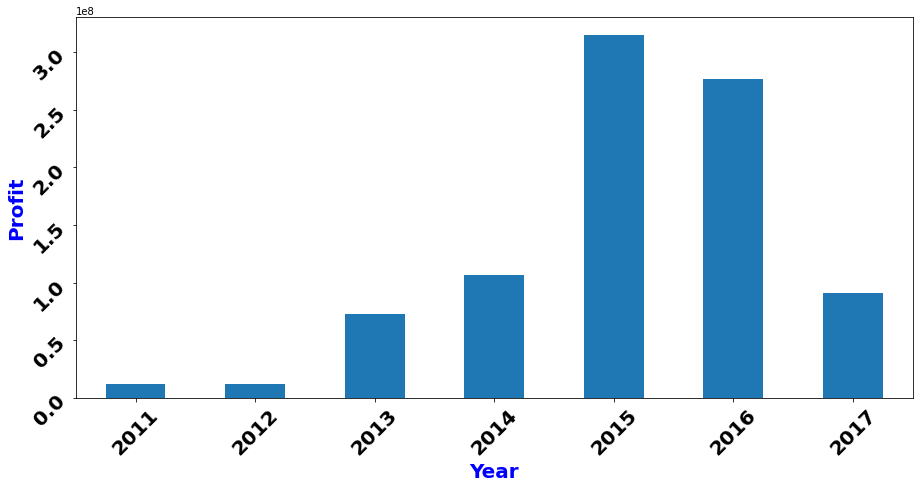

In [52]:
# profit year wise

plt.figure(figsize=(15,7))
df.groupby(['Year'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Profit')

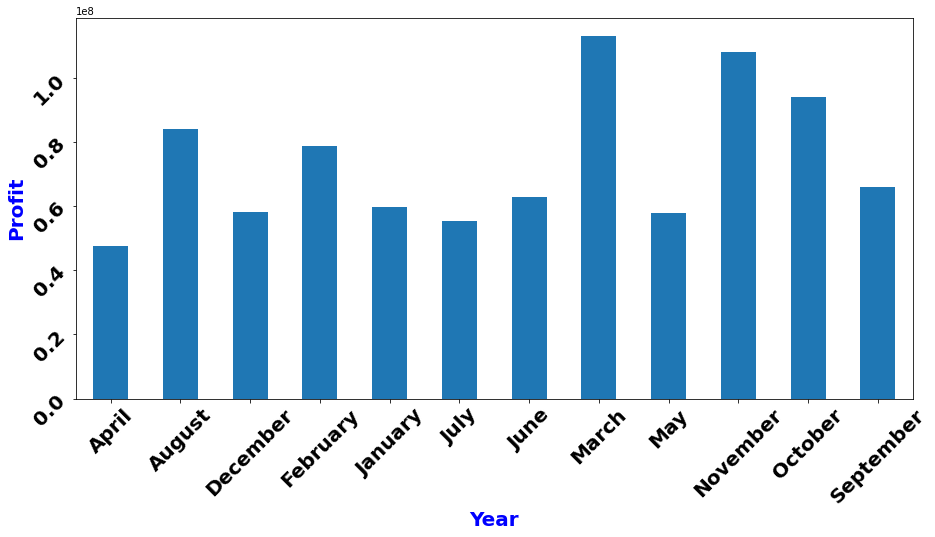

In [53]:
# profit month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Number of Subscribers')

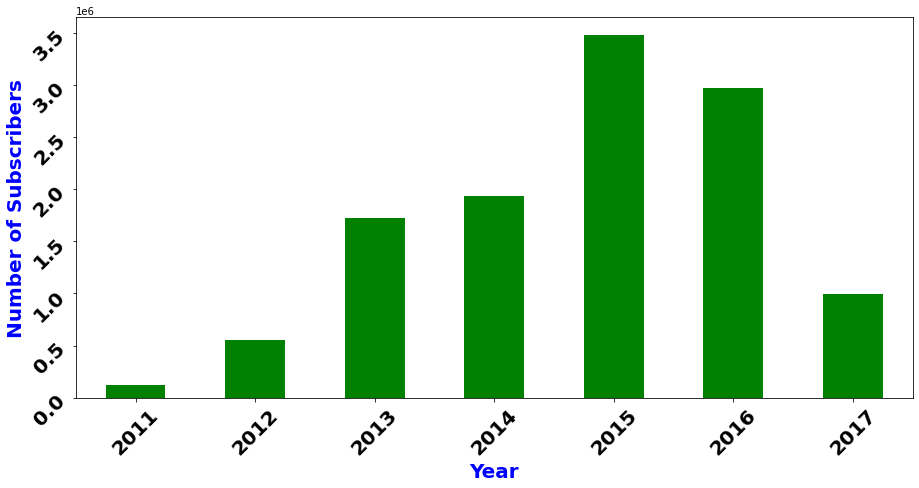

In [54]:
# number of subscribers per year

plt.figure(figsize=(15,7))
df.groupby(['Year'])['num_subscribers'].sum().plot(kind = 'bar',color = 'green')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Number of Subscribers')

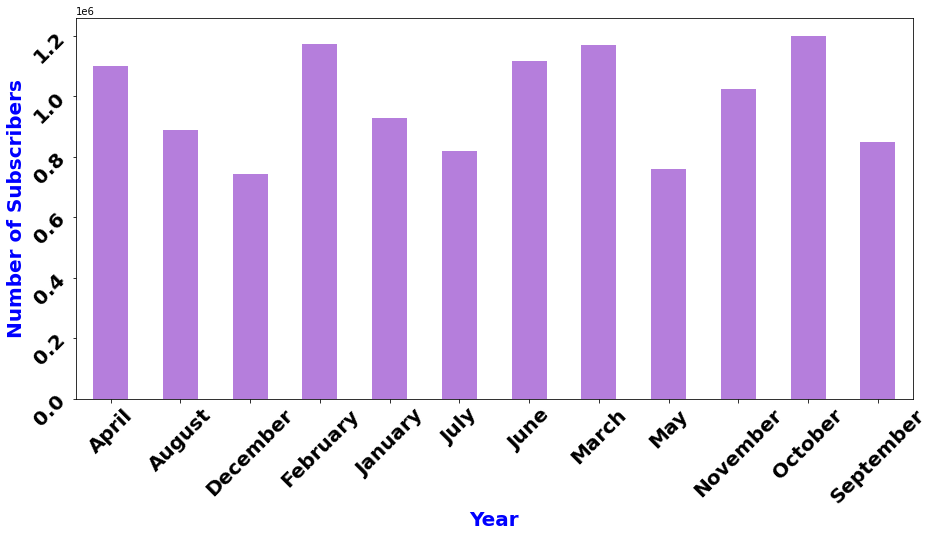

In [55]:
# number of subscribers month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['num_subscribers'].sum().plot(kind = 'bar',
                                                         color = '#b57edc')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

<div class="text_cell_render border-box-sizing rendered_html">
<h4>Questions on Course Title<a class="anchor-link" href="#Questions-on-Course-Title">¶</a>
</h4>
<ul>
<li>Course Title<ul>
<li>What is the most frequent words in course title</li>
<li>Longest/Shortest course title</li>
<li>How can we build recommendation systems via title using similarity</li>
<li>Most famous courses by number of subscribers</li>
</ul>
</li>
</ul>

</div>

In [56]:
df.head(3)

course_id                                       course_title  ... Day Month_name
0    1070968                 Ultimate Investment Banking Course  ...  18    January
1    1113822  Complete GST Course & Certification - Grow You...  ...   9      March
2    1006314  Financial Modeling for Business Analysts and C...  ...  19   December

[3 rows x 22 columns]

In [57]:
# course with maximum length

df[df['course_title'].str.len()==max(df['course_title'].str.len())]

course_id  ... Month_name
2191     286898  ...       July

[1 rows x 22 columns]

In [58]:
df['course_title'].iloc[2190]

'Aprende a tocar el Acordeón \'de oído y con técnica",https://www.udemy.com/aprende-a-tocar-el-acordeon-de-oido-y-con-tecnica/,true,25,93,21,34,Beginner Level,4 hours,2014-09-16T19:51:45Z\n263432,Aprende los Secretos de la Armónica con HARP&SOUL"'

In [59]:
df.iloc[2190]

course_id                                                         286898
course_title           Aprende a tocar el Acordeón 'de oído y con téc...
url                    https://www.udemy.com/aprende-los-secretos-de-...
is_paid                                                              NaN
price                                                                 75
num_subscribers                                                      158
num_reviews                                                           17
num_lectures                                                          59
level                                                         All Levels
content_duration                                               2.5 hours
published_timestamp                                 2014-07-28T13:55:43Z
subject                                              Musical Instruments
profit                                                             11850
published_date                                     

In [60]:
# most reviewed course

df[df['num_reviews']==max(df['num_reviews'])]



course_id                course_title  ... Day Month_name
3235     625204  The Web Developer Bootcamp  ...   2   November

[1 rows x 22 columns]

In [61]:
# course with maximum length

df[df['course_title'].str.len()==min(df['course_title'].str.len())]

course_id course_title  ... Day Month_name
1328    1164570       调色高级讲解  ...  31      March
1674    1164720       调色中级课程  ...  31      March

[2 rows x 22 columns]

In [62]:
df.iloc[1327]

course_id                                              1009622
course_title              超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜
url                    https://www.udemy.com/blender-beginner/
is_paid                                                    NaN
price                                                       80
num_subscribers                                              8
num_reviews                                                  1
num_lectures                                                43
level                                           Beginner Level
content_duration                                     5.5 hours
published_timestamp                       2016-12-14T01:25:19Z
subject                                         Graphic Design
profit                                                     640
published_date                             2016-12-14 00:00:00
published_time                                       01:25:19Z
year                                                   

### Keyword Extraction

<ul>
<li>Rake</li>
<li>Yakes</li>
<li>Collection</li>
</ul>

In [63]:
# this library we will use for removing stopwords and tokenization

!pip install neattext

     |████████████████████████████████| 114 kB 4.1 MB/s 


In [64]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [65]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [66]:
# removing all the stopwords

df['Clean_title'] = df['course_title'].apply(nfx.remove_shortwords)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [67]:
# head on head comparision

temp = df[['Clean_title','course_title']]

temp.head()

Clean_title                                       course_title
0                Ultimate Investment Banking Course                 Ultimate Investment Banking Course
1  Complete Course Certification Grow Your Practice  Complete GST Course & Certification - Grow You...
2  Financial Modeling Business Analysts Consultants  Financial Modeling for Business Analysts and C...
3            Beginner Financial Analysis Excel 2017  Beginner to Pro - Financial Analysis in Excel ...
4             Maximize Your Profits Trading Options       How To Maximize Your Profits Trading Options

In [69]:
temp['Clean_title'].iloc[293]

'Multiply your returns using Value Investing https udemy multiply your returns using value investing true 1942 Levels hours 2015 23T00 874284 Weekly Forex Analysis Baraq'

In [70]:
temp['course_title'].iloc[293]

'Multiply your returns using \'Value Investing",https://www.udemy.com/multiply-your-returns-using-value-investing/,true,20,1942,19,63,All Levels,4.5 hours,2015-07-23T00:08:33Z\n874284,Weekly Forex Analysis by Baraq FX"'

In [71]:
# we can observe special characters in clean title,we'll remove them

df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [72]:
# tokenisation

all_title_list = df['Clean_title'].to_list()

all_title_list[1:5]

['Complete Course Certification Grow Your Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Financial Analysis Excel 2017',
 'Maximize Your Profits Trading Options']

In [73]:
alltokens = [token for line in all_title_list for token in line.split()]

print(len(alltokens))

print(alltokens[1:4])

18227
['Investment', 'Banking', 'Course']


In [74]:
## top50 frequently used words 

from collections import Counter

freq_words = dict(Counter(alltokens).most_common(50))

freq_words

{'Accounting': 114,
 'Adobe': 100,
 'Advanced': 77,
 'Analysis': 78,
 'Angular': 58,
 'Basics': 89,
 'Beginner': 138,
 'Beginners': 235,
 'Bootstrap': 64,
 'Build': 164,
 'Building': 56,
 'Business': 62,
 'Complete': 181,
 'Course': 235,
 'Create': 136,
 'Design': 189,
 'Development': 110,
 'Easy': 76,
 'Financial': 139,
 'Forex': 165,
 'From': 101,
 'Guide': 116,
 'Guitar': 211,
 'HTML': 118,
 'HTML5': 68,
 'Illustrator': 90,
 'Introduction': 93,
 'JavaScript': 124,
 'Learn': 495,
 'Lessons': 73,
 'Level': 80,
 'Master': 92,
 'Options': 101,
 'Photoshop': 169,
 'Piano': 179,
 'Play': 100,
 'Professional': 79,
 'Scratch': 83,
 'Stock': 65,
 'Stocks': 55,
 'Trade': 66,
 'Trading': 281,
 'Website': 111,
 'With': 99,
 'WordPress': 83,
 'Your': 119,
 'from': 111,
 'play': 61,
 'with': 278,
 'your': 57}

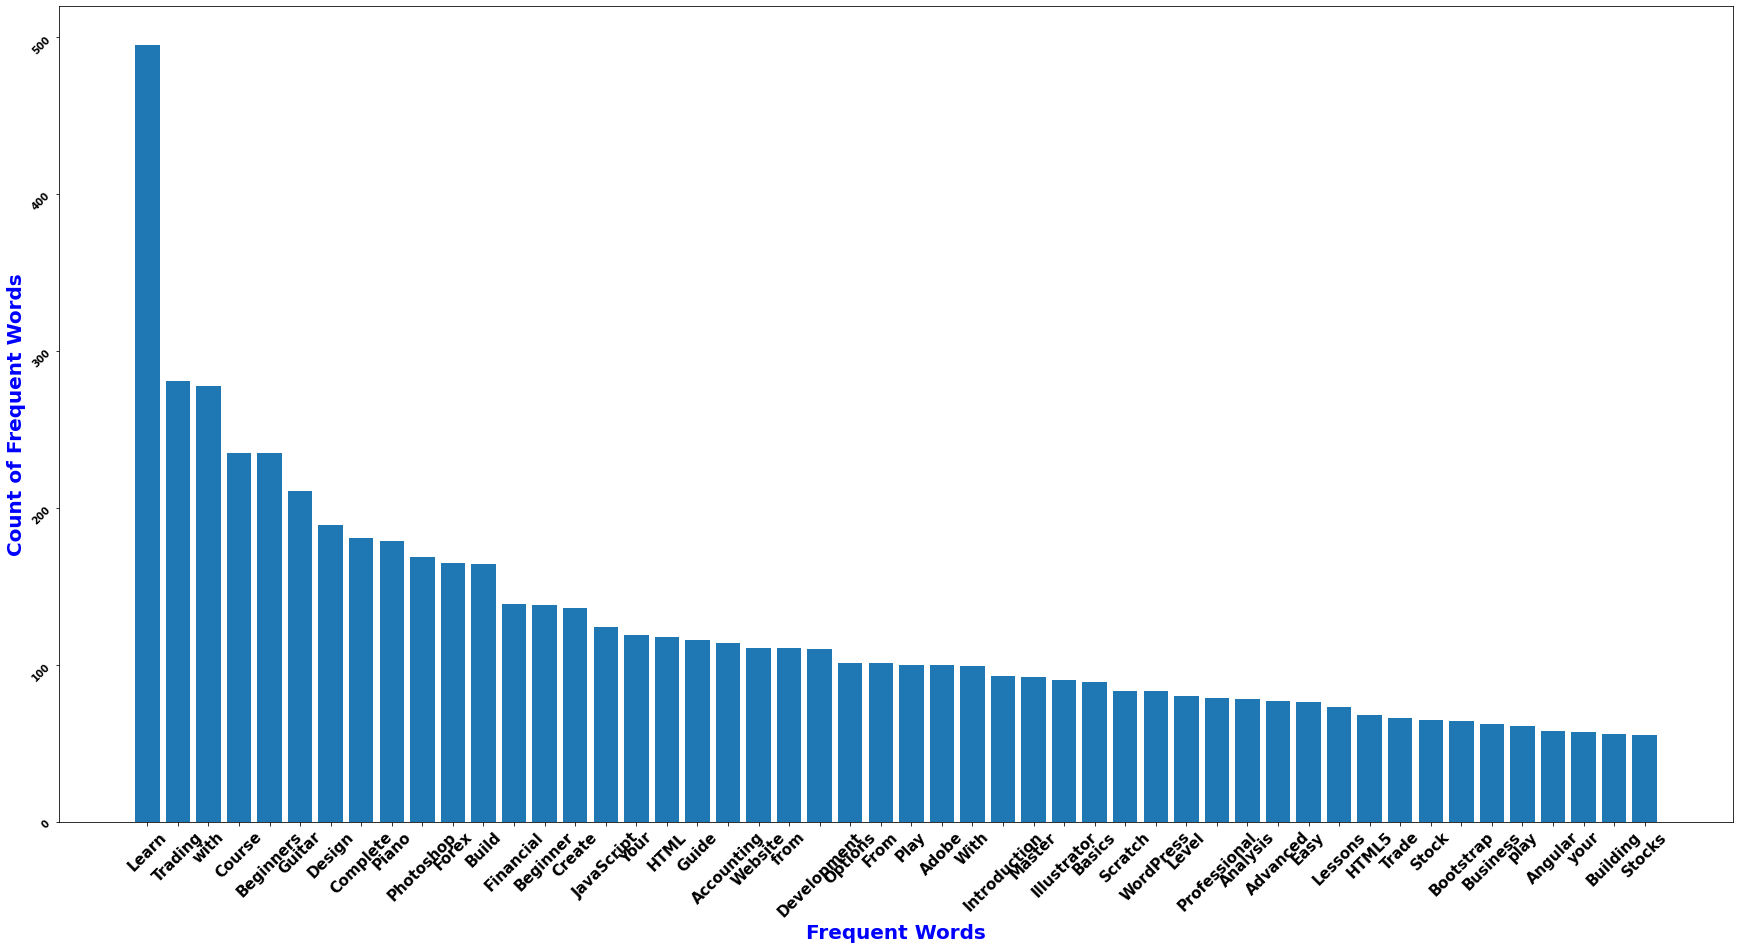

In [75]:
plt.figure(figsize=(30,15))
plt.bar(*zip(*freq_words.items()))
plt.xticks(rotation = 45)

plt.xticks(fontsize = 15,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 10,fontweight = 'bold',rotation = 45)
plt.xlabel('Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Count of Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

In [76]:
!pip install rake_nltk

     |████████████████████████████████| 1.5 MB 5.5 MB/s 
     |████████████████████████████████| 749 kB 41.9 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


##### Tokenization

In [79]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')
rake = Rake()

allwords = ''.join(alltokens)

rake.extract_keywords_from_text(allwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [80]:
rake.get_ranked_phrases_with_scores()

[(1.0,
  'ultimateinvestmentbankingcoursecompletecoursecertificationgrowyourpracticefinancialmodelingbusinessanalystsconsultantsbeginnerfinancialanalysisexcel2017maximizeyourprofitstradingoptionstradingpennystocksguidelevels2017investingtradingbeginnersmasteringpricechartstradingstockchartpatternsimmediateexplosivegainsoptionstradingadvancedstockprofitsuccessmethodonlyinvestmentstrategyneedyourretirementforextradingsecretsproswithamazontradingoptionswithmoneyflowfinancialmanagementriskreturnsecuritiesforextradingcourseworksmarterharderprovenresultspythonalgotradingsentimenttradingwithnewsshortsellinglearnsellstocksbeforefallbasictechnicalanalysislearnstructuremarketcompletechartpatterntradingcourseprovenapproachdeadlymistakesinvestingthatwillslashyourprofitsfinancialstatementsmadeeasywinningforextradingwithliveforextradingexamplesforextraderscreateyourfirsttradingrobotcodingcreatebusinessfromhometradingstockstoday2017introductionaccountingmasteringfinancialstatementscompleteethereumcou